# **Music Recommendation System**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

 This problem is important to solve because almost every internet-based company's revenues depends on how long consumers spend on the playform. These companies need to be able to figure out what kind of songs are needed in order to maximize customers' time spent on the platform. So one of the challenges is figuring out what kind of content users are most likely going to consume. Spotify in particular has grown significantly due to its ability to recommend the best songs to listeners. 

### **The objective:**

 - What is the intended goal?

 The intended goal is to find and optimize the best model that predicts 10 songs a user will like and recommend those songs to the user. We will determine model which performs the best out of several models: popularity/rank based, similarity based collaborative filtering, model based (matrix factoristing, and content based, and clustering based.  

### **The key questions:**

- What are the key questions that need to be answered? 

The key questions that need to be answered is what information do we have about users and songs to best create and tune our models. How can we use user behavior and previous engagement to anticipate future engagement with songs they may or may not have heard. 

### **The problem formulation**:

- What is it that we are trying to solve using data science?

We are trying to solve the issue of users not being interested enough with what they are being offered on Spotify, and thus leaving the platform. We are trying to create better recommendations so that users stay on the platform. This requires us to come up with different models, train them, test them, and optimize them, to create the best working model that makes the best recommendations. Namely in this project we are trying to anticipate play count of songs that users have or have not heard. 

## **Data Dictionary**

The core data is the Taste Profile Subset released by the Echo Nest as part of the Million Song Dataset. There are two files in this dataset. The first file contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data

song_id - A unique id given to every song

title - Title of the song

Release - Name of the released album

Artist_name - Name of the artist 

year - Year of release

count_data

user _id - A unique id given to the user

song_id - A unique id given to the song

play_count - Number of times the song was played

## **Data Source**
http://millionsongdataset.com/

### **Importing Libraries and the Dataset**

In [87]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
# Used to ignore the warning given as output of the code
import warnings
warnings.filterwarnings('ignore')

# Basic libraries of python for numeric and dataframe computations
import numpy as np
import pandas as pd


# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt


# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Impoort mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error


### **Load the dataset**

In [89]:
# Importing the datasets
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv') 
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')


#df_copy = df.copy(deep = True) # Copying the data to another DataFrame

### **Understanding the data by viewing a few observations**

In [90]:
# See top 10 records of count_df data
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [91]:
# See top 10 records of song_df data
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


### **Let us check the data types and and missing values of each column**

In [92]:
# See the info of the count_df data
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [93]:
# See the info of the song_df data
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights: From the count_df data frame there are 4 columns. The data types are int (unnamed: 0 and play_count) and object (user_id and song_id).Of the song_df data frame there are 5 columns. The data types are object (song_id, title, release, artist_name) and int (year). There are some null objects in title and release columns.**


In [94]:
# Left merge the count_df and song_df data on "song_id". Drop duplicates from song_df data simultaneously
alt_df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")

# Drop the column 'Unnamed: 0'
alt_df.drop(columns =['Unnamed: 0'])

# Name the obtained dataframe as "df"
df = alt_df.drop(columns =['Unnamed: 0'])

**Think About It:** As the user_id and song_id are encrypted. Can they be encoded to numeric features?

In [95]:
# Apply label encoding for "user_id" and "song_id"
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(df['song_id'])
df['song_id'] = encoder.transform(df['song_id'])

encoder.fit(df['user_id'])
df['user_id'] = encoder.transform(df['user_id'])

**Think About It:** As the data also contains users who have listened to very few songs and vice versa, is it required to filter the data so that it contains users who have listened to a good count of songs and vice versa?

A dataset of size 2000000 rows x 7 columns can be quite large and may require a lot of computing resources to process. This can lead to long processing times and can make it difficult to train and evaluate your model efficiently.
In order to address this issue, it may be necessary to trim down your dataset to a more manageable size.

In [96]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [97]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [98]:
# Get the column containing the songs
songs = df.song_id
# Create a dictionary from songs to their number of users
ratings_count = dict()
for song in songs:
    # If we already have the song, just add 1 to their rating count
    if song in ratings_count:
        ratings_count[song] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[song] = 1    

In [99]:
# We want our song to be listened by atleast 120 users to be considred
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_songs = []
for song, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_songs.append(song)
df_final= df.loc[~df.song_id.isin(remove_songs)]

In [100]:
# Drop records with play_count more than(>) 5
df_final=df_final[df_final.play_count<=5]

In [101]:
# Check the shape of the data
df_final.shape
df_final

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007
...,...,...,...,...,...,...,...
1999734,47786,9139,1,Half Of My Heart,Battle Studies,John Mayer,0
1999736,47786,9186,1,Bitter Sweet Symphony,Bitter Sweet Symphony,The Verve,1997
1999745,47786,9351,2,The Police And The Private,Live It Out,Metric,2005
1999755,47786,9543,1,Just Friends,Back To Black,Amy Winehouse,2006


## **Exploratory Data Analysis**

### **Let's check the total number of unique users, songs, artists in the data**

Total number of unique user id

In [102]:
# Display total number of unique user_id
df_final['user_id'].nunique()

3155

Total number of unique song id

In [103]:
# Display total number of unique song_id
df_final['song_id'].nunique()

563

Total number of unique artists

In [104]:
# Display total number of unique artists
df_final['artist_name'].nunique()

232

#### **Observations and Insights:The total number of unique user id's is 3155, the total number of unique song id's is 563, the total number of unique artists is 232.**


### **Let's find out about the most interacted songs and interacted users**

Most interacted songs

In [105]:
df_final['title'].value_counts().head(10)


Use Somebody                      751
Dog Days Are Over (Radio Edit)    748
Sehr kosmisch                     713
Clocks                            662
The Scientist                     652
Secrets                           618
Fireflies                         609
Creep (Explicit)                  606
Yellow                            583
Hey_ Soul Sister                  570
Name: title, dtype: int64

Most interacted users

In [106]:
df_final['user_id'].value_counts().head(10)

61472    243
15733    227
37049    202
9570     184
23337    177
10763    176
26616    175
9097     175
43041    174
65994    171
Name: user_id, dtype: int64

#### **Observations and Insights:The most interacted songs shows us the top 10 songs with the most listeners. The most interacted users shows us the top 10 users who listen to the most songs.**


Songs played in a year

In [107]:
# Find out the number of songs played in a year
  # Hint: # Hint: Use groupby function on the 'year' column

numsongs = df_final.groupby(['year']).count()['title']
altsongs = pd.DataFrame(numsongs)
altsongs.drop(altsongs.index[0], inplace = True)
altsongs

,title
year,
1969,238
1970,109
1971,133
1973,270
1974,583
1975,173
1976,478
1978,119
1979,220


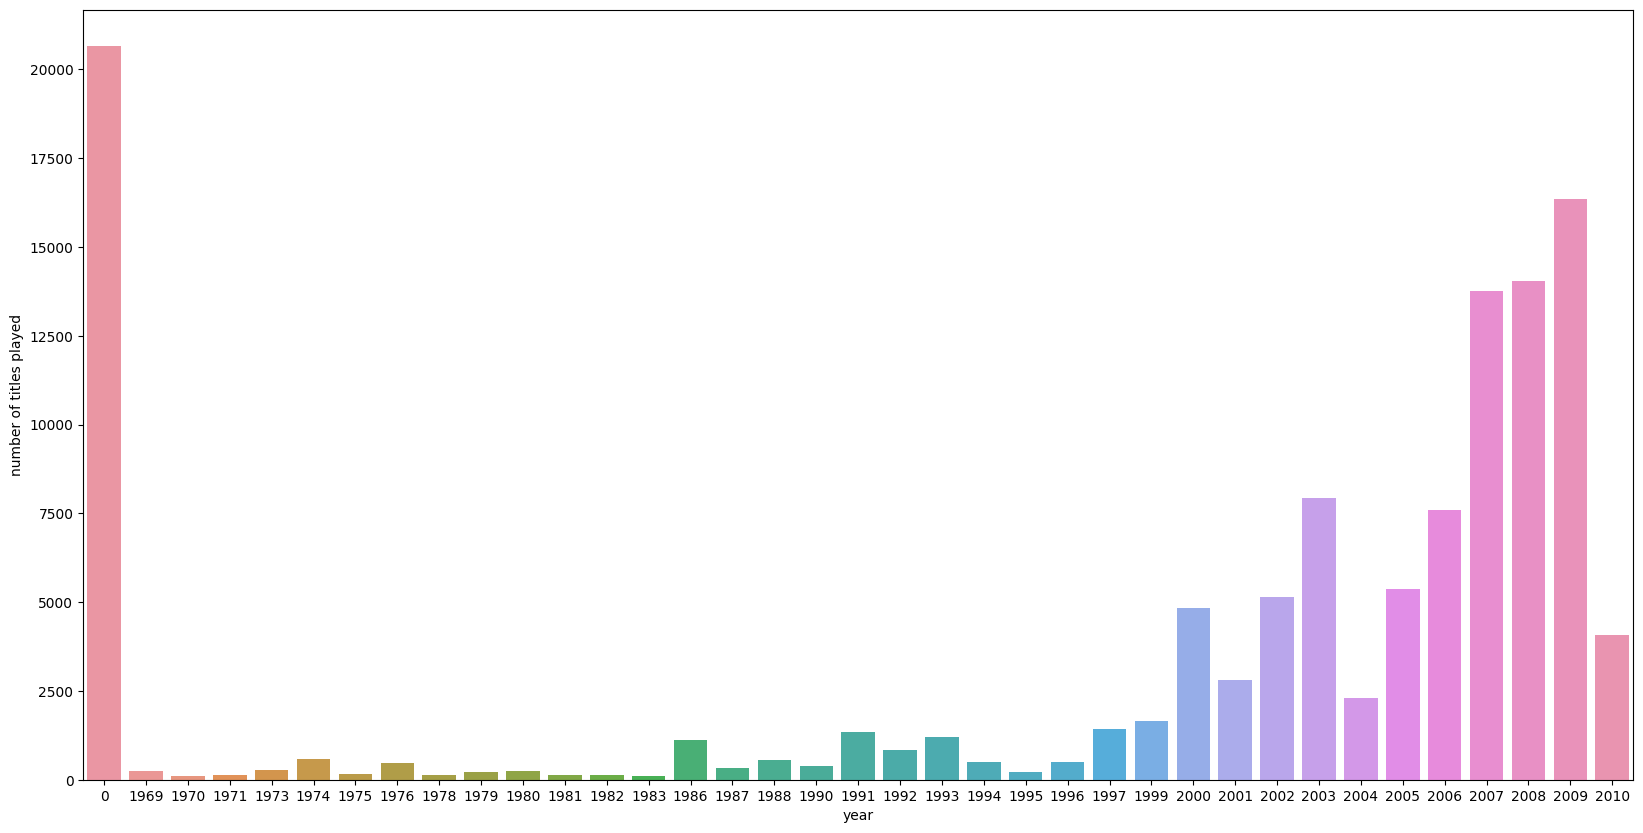

In [108]:
# Create a barplot plot with y label as "number of titles played" and x -axis year

plt.figure(figsize = (20, 10))
sns.countplot(x="year", data=df_final)
# Set the figure size

# Set the x label of the plot
plt.xlabel('year')
# Set the y label of the plot
plt.ylabel('number of titles played')
# Show the plot
plt.show()


#### **Observations and Insights: What we can gather from our barplot is that The number of titles played increases as the year increases, generally. It seems that people are listening more to music that has been released from 1999-2010. It might be beneficial to include mostly newer music 2000-2009 in algorithms to keep listeners on the site. We might also observe that for the years 2001, 2004 where the listenership is lower, perhaps the "trend" of songs from that year hasn't come back around. Maybe 2010 is so low because the data was not gathered at the end of that year, or because the songs were so new and people didn't have the chance to hear them.** # 

**Think About It:** What other insights can be drawn using exploratory data analysis?

Now that we have explored the data, let's apply different algorithms to build recommendation systems.

**Note:** Use the shorter version of the data, i.e., the data after the cutoffs as used in Milestone 1.

## Building various models

### **Popularity-Based Recommendation Systems**

Let's take the count and sum of play counts of the songs and build the popularity recommendation systems based on the sum of play counts.

In [109]:
# Calculating average play_count
       # Hint: Use groupby function on the song_id column
average_count = df_final.groupby(['song_id']).mean().play_count
print(average_count)

# Calculating the frequency a song is played
      # Hint: Use groupby function on the song_id column
play_freq = df_final.groupby(['song_id']).count().play_count
print(play_freq)

song_id
21      1.622642
22      1.492424
52      1.729216
62      1.728070
93      1.452174
          ...   
9939    1.683983
9942    2.486667
9960    1.597122
9981    1.921053
9989    1.333333
Name: play_count, Length: 563, dtype: float64
song_id
21      265
22      132
52      421
62      114
93      115
       ... 
9939    231
9942    150
9960    139
9981    152
9989    120
Name: play_count, Length: 563, dtype: int64


In [110]:
# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count': average_count, 'play_freq': play_freq})

# Let us see the first five records of the final_play dataset
final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the top n songs for a recommendation based on the average play count of song. We can also add a threshold for a minimum number of playcounts for a song to be considered for recommendation.

In [111]:
# Build the function to find top n songs
def top_n_songs(average_count, n, min_plays):
    
    # Finding songs with minimum number of plays
    recommendations = final_play[final_play['play_freq'] >= min_plays]
    
    # Sorting values with respect to average plays 
    recommendations = recommendations.sort_values(by='avg_count', ascending = False)
    
    return recommendations.index[:n]

In [112]:
# Recommend top 10 songs using the function defined above
list(top_n_songs(final_play, 10, 200))

[5531, 2220, 614, 352, 1664, 6246, 4448, 1334, 8019, 7496]

### **User User Similarity-Based Collaborative Filtering**

To build the user-user-similarity-based and subsequent models we will use the "surprise" library.

In [113]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [114]:
# Import necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

### Some useful functions

Below is the function to calculate precision@k and recall@k, RMSE, and F1_Score@k to evaluate the model performance.

**Think About It:** Which metric should be used for this problem to compare different models?

In [115]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(model, k = 30, threshold = 1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)

    # Command to print the overall precision
    print('Precision: ', precision)

    # Command to print the overall recall
    print('Recall: ', recall)
    
    # Formula to compute the F-1 score
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3))

**Think About It:** In the function precision_recall_at_k above the threshold value used is 1.5. How precision and recall are affected by changing the threshold? What is the intuition behind using the threshold value of 1.5? 

In [116]:
# Instantiating Reader scale with expected rating scale 
 #use rating scale (0, 5)
reader = Reader(rating_scale= [0,5])

# Loading the dataset
 # Take only "user_id","song_id", and "play_count"
data = Dataset.load_from_df(df_final[['user_id', 'song_id', "play_count"]], reader) 

# Splitting the data into train and test dataset
 # Take test_size = 0.4, random_state = 42
trainset, testset = train_test_split(data, test_size= 0.4, random_state = 42) 

**Think About It:** How changing the test size would change the results and outputs?

In [182]:
# Build the default user-user-similarity model
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items
 # Use random_state = 1 
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1) 

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)


# Let us compute precision@k, recall@k, and f_1 score with k = 30
 # Use sim_user_user model
precision_recall_at_k(sim_user_user) 

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observations and Insights: In the user-user similarity based model, our RMSE is 1.08, and our F_1 score .50. There is room for improvement if we can lower the RMSE and raise the F_1.**

In [183]:
# Predicting play_count for a sample user with a listened song
# Use any user id  and song_id 
sim_user_user.predict(47786, 9186, r_ui = 2, verbose = True)

user: 47786      item: 9186       r_ui = 2.00   est = 1.57   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=47786, iid=9186, r_ui=2, est=1.575, details={'actual_k': 40, 'was_impossible': False})

In [184]:
# Predicting play_count for a sample user with a song not-listened by the user
 #predict play_count for any sample user


sim_user_user.predict(6958, 97, verbose = True)

user: 6958       item: 97         r_ui = None   est = 1.55   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=97, r_ui=None, est=1.55, details={'actual_k': 40, 'was_impossible': False})

**Observations and Insights: The estimated the play count for our user 47786 is 1.57, and the actual is 2 plays. At a first glance, the model seems to be performing well, because that's fairly close. For user 6958, the estimated number of plays for song 97 is 1.55. We have no idea whether that's accurate or not because the user has never listened to the song.**

Now, let's try to tune the model and see if we can improve the model performance.

In [120]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine", 'pearson', "pearson_baseline"],
                              'user_based': [True], "min_support": [2, 4]}
              }


# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)# Use entire data for GridSearch

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.046368205787034
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


In [180]:
# Train the best model found in above gridsearch
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True, 'min_support': 2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options = sim_options, k = 30, min_k = 9, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


**Observations and Insights: In our optimized similarity based user-user model, our RMSE is 1.05 and F_1 is .525. The RMSE has increased very slightly, and the F_1 score has increased from .49 to .525. We could say this model is doing  better than the baseline.**

In [185]:
# Predict the play count for a user who has listened to the song. Take user_id 6958, song_id 1671 and r_ui = 2
sim_user_user_optimized.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

In [186]:
# Predict the play count for a song that is not listened to by the user (with user_id 6958)
sim_user_user_optimized.predict(6958, 765, r_ui = None, verbose = True)

user: 6958       item: 765        r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=765, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

**Observations and Insights: In our optimized user-user model, predicted play count for user 6958 of song 1671 is 1.96, which is very close to the actual play count of 2. This is much better than in the baseline model. The estimated play count of song 765 by user 6958 is 1.70. We don't know whether this is accurate or not, because the user has not listened to the song.**

**Think About It:** Along with making predictions on listened and unknown songs can we get 5 nearest neighbors (most similar) to a certain song?

In [190]:
# Use inner id 0
sim_user_user_optimized.get_neighbors(0, 5)

[42, 1131, 17, 186, 249]

Below we will be implementing a function where the input parameters are:

- data: A **song** dataset
- user_id: A user-id **against which we want the recommendations**
- top_n: The **number of songs we want to recommend**
- algo: The algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [125]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended product ids
    recommendations = []
    
    # Creating an user-song interactions matrix 
    user_song_interactions_matrix = data.pivot_table(index = 'user_id', columns = 'song_id', values = 'play_count')

    # Extracting those song ids which the user_id has not listened yet
    non_interacted_songs = user_song_interactions_matrix.loc[user_id][user_song_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the song ids which user_id has not interacted yet
    for song_id in non_interacted_songs:
        
        # Predicting the plays for those non visited song ids by this user
        est = algo.predict(user_id, song_id).est
        
        # Appending the predicted songs
        recommendations.append((song_id, est))

    # Sorting the predicted songs in descending order
    recommendations.sort(key = lambda x : x[1], reverse = True)

    # Returing top n highest predicted songs for this user
    return recommendations[:top_n]

In [191]:
# Make top 5 recommendations for any user_id with a similarity-based recommendation engine
clustering_recommendations = get_recommendations(df_final, 6958, 5, sim_user_user_optimized)

In [192]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(clustering_recommendations, columns = ['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,5531,2.553335
1,317,2.518269
2,4954,2.406776
3,8635,2.396606
4,5943,2.390723


**Observations and Insights: Our top 5 recommended songs for user 6958 are displayed above, as are their predicted ratings. It's worth noting that each song is played between two and approx three times.**

### Correcting the play_counts and Ranking the above songs

In [128]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

  return ranked_songs

**Think About It:** In the above function to correct the predicted play_count a quantity 1/np.sqrt(n) is subtracted. What is the intuition behind it? Is it also possible to add this quantity instead of subtracting?

In [193]:
# Applying the ranking_songs function on the final_play data
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
0,5531,618,2.553335,2.513109
2,317,411,2.518269,2.468943
1,5943,423,2.390723,2.342101
3,4954,183,2.406776,2.332854
4,8635,155,2.396606,2.316284


**Observations and Insights: We have corrected the play counts and ranked our songs in the final_play data using our ranking_songs function. We can note that the corrected ratings for these five songs are lower than the predicted ratings for all of them. The position of song ID 5943 changed after using the ranking songs fxn.**

### Item Item Similarity-based collaborative filtering recommendation systems 

In [130]:
# Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# Declaring the similarity options
sim_options = {'name': 'cosine',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options = sim_options, random_state = 1, verbose = False)

# Train the algorithm on the train set, and predict ratings for the test set
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
precision_recall_at_k(sim_item_item)

RMSE: 1.0394
Precision:  0.307
Recall:  0.562
F_1 score:  0.397


**Observations and Insights: In our similarity based item-item model, the RMSE is 1.03, the F_1 score .397. The precision is .30 and our recall is .56. Let us see if we can lower the RMSE and F_1 score in our optimized model.**

In [131]:
# Predicting play count for a sample user_id 6958 and song (with song_id 1671) heard by the user
sim_item_item.predict(6958, 1671, r_ui = 5, verbose = True)

user: 6958       item: 1671       r_ui = 5.00   est = 1.36   {'actual_k': 20, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=5, est=1.3614157231762556, details={'actual_k': 20, 'was_impossible': False})

In [132]:
# Predict the play count for a user that has not listened to the song (with song_id 1671)
#print(df_final.get(['user_id', 'song_id']).iloc[120:170])
sim_item_item.predict(55837, 1671, verbose = True)

user: 55837      item: 1671       r_ui = None   est = 2.96   {'actual_k': 2, 'was_impossible': False}


Prediction(uid=55837, iid=1671, r_ui=None, est=2.962288745676875, details={'actual_k': 2, 'was_impossible': False})

**Observations and Insights: Using our baseline item-item similarity based model, the estimated plays of song 1671 by user 6958 is 1.36, when in realy it was 5. Our model appears to be working fairly poorly. THe predicted play count of song 1671 by user 55837 is 2.96. We dont know how accurate this estimate it, as the user has never heard the song.**

In [133]:
# Apply grid search for enhancing model performance

# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9], 'sim_options': {'name': ['msd', 'cosine'], 'user_based': [False]}}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse', 'mae'], cv = 3, n_jobs = -1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
print(gs.best_score['rmse'])

# Extract the combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0326643531039543
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'cosine', 'user_based': False}}


**Think About It:** How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/knn_inspired.html).

In [179]:
# Apply the best modle found in the grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'cosine', 'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_option=sim_options , k=30 , min_k=6, random_state = 1, verbose = False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
precision_recall_at_k(sim_item_item_optimized)


RMSE: 1.0669
Precision:  0.412
Recall:  0.6
F_1 score:  0.489


**Observations and Insights: In our optimized item-item similarity based model, the RMSE is 1.06 which is a bit higher than the baseline model. The F_1 score is .489, which is higher than in the baseline model (.39). As such we can say that this optimized model has improved.**

In [194]:
# Predict the play_count by a user(user_id 6958) for the song (song_id 1671)
sim_item_item_optimized.predict(6958, 1671, r_ui = 5, verbose = True)

user: 6958       item: 1671       r_ui = 5.00   est = 1.63   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=5, est=1.6254190211665536, details={'actual_k': 30, 'was_impossible': False})

In [195]:
# Predicting play count for a sample user_id 6958 with song_id 3232 which is not heard by the user
sim_item_item_optimized.predict(6958, 3232, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.36   {'actual_k': 30, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.3609600600037504, details={'actual_k': 30, 'was_impossible': False})

**Observations and Insights: In our optimized item-item similarity based model, the predicted number of plays of song 1671 by user 6958 is 1.63, when in reality it was 5. Although this is still not very accurate, it is a closer estimate than the baseline model, so we can see that the optimized model is performing better. The predicted play count of song 3232 by user 6958 is 1.36. We don't know how accurate this is, as the user has never heard that song.**

In [196]:
# Find five most similar items to the item with inner id 0
sim_item_item_optimized.get_neighbors(0, k = 5)

[31, 82, 90, 116, 125]

In [197]:
# Making top 5 recommendations for any user_id  with item_item_similarity-based recommendation engine
clustering_recommendations = get_recommendations(df_final, 6958, 5, sim_item_item_optimized)

In [198]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(clustering_recommendations, columns = ['song_id', 'predicted_play_count'])

,song_id,predicted_play_count
0,7224,2.921299
1,6450,2.668720
2,8324,2.451510
3,614,2.433333
4,6448,2.386082


In [199]:
# Applying the ranking_songs function
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.921299,2.824625
3,6450,102,2.668720,2.569705
0,614,373,2.433333,2.381555
4,8324,96,2.451510,2.349448
1,6448,109,2.386082,2.290300


**Observations and Insights: In our ranked songs, we are seeing that the corrected ratings are just slightly lower than the predicted ratings, similar to how it was in the previous implementation of the ranking_songs function. The position of song 614 changed after implementing the ranking_songs function.**

### Model Based Collaborative Filtering - Matrix Factorization

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

In [141]:
# Build baseline model using svd
# Using SVD matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the train set
svd.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


In [142]:
# Making prediction for user (with user_id 6958) to song (with song_id 1671), take r_ui = 2
svd.predict(6958, 1671, r_ui = 2, verbose = True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

In [143]:
# Making a prediction for the user who has not listened to the song (song_id 3232)
svd.predict(6958, 3232, r_ui = None, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

#### Improving matrix factorization based recommendation system by tuning its hyperparameters

In [144]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}


# Performe 3-fold grid-search cross-validation
gs = GridSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0125627057090811
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html).

In [200]:
# Building the optimized SVD model using optimal hyperparameters
svd_algo_optimized = SVD(n_epochs=30, lr_all=.01, reg_all=0.2, random_state=1)

# Train the algorithm on the train set
svd_algo_optimized = svd_algo_optimized.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
precision_recall_at_k(svd_algo_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


**Observations and Insights: The optimized svd model has a RMSE of 1.01, and F_1 score of .50. The RMSE is slightly lower than in the baseline svd algo, and the F_1 score is slightly higher. Thus, we have reason to believe this optimized model is performing better.**

In [201]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671
svd_algo_optimized.predict(6958, 1651, r_ui = 5, verbose = True)

user: 6958       item: 1651       r_ui = 5.00   est = 1.47   {'was_impossible': False}


Prediction(uid=6958, iid=1651, r_ui=5, est=1.4700063635133478, details={'was_impossible': False})

In [202]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
svd_algo_optimized.predict(6958, 3232, r_ui = None, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4425484461176483, details={'was_impossible': False})

**Observations and Insights: Our optimized svd model predicts that user 6958 will listen to song 1671 1.47 times, when in reality they listened to it 5 times. The model does not appear to be performing that well, as 1.47 is not very close to 5. The model predicts that user 6958 will isten to song 3232 1.44 times. We don't know whether this is accurate or not, as the user has never actually listened to that song.**

In [203]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_algo_optimized)


In [204]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


**Observations and Insights: Using our svd optimized algorithm, it appears that the corrected ratings are quite close to the predicted ratings. Note how the last three songs, predicted_rating and corrected_rating only differ by .01. We might note that there is some overlap between recommended songs for this user and those of previous models.**

### Cluster Based Recommendation System

In **clustering-based recommendation systems**, we explore the **similarities and differences** in people's tastes in songs based on how they rate different songs. We cluster similar users together and recommend songs to a user based on play_counts from other users in the same cluster.

In [150]:
# Make baseline clustering model
# Using CoClustering algorithm
clust_baseline = CoClustering(random_state = 1)

# Training the algorithm on the train set
clust_baseline.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


In [205]:
# Making prediction for user_id 6958 and song_id 1671
clust_baseline.predict(6958, 1671, r_ui = 4, verbose = True)

user: 6958       item: 1671       r_ui = 4.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=4, est=1.2941824757363074, details={'was_impossible': False})

In [206]:
# Making prediction for user (userid 6958) for a song(song_id 3232) not heard by the user
clust_baseline.predict(6958, 3232, r_ui = None, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

#### Improving clustering-based recommendation system by tuning its hyper-parameters

In [153]:
# Set the parameter space to tune
param_grid = {'n_cltr_u': [5, 6, 7, 8], 'n_cltr_i': [5, 6, 7, 8], 'n_epochs': [10, 20, 30]}

# Performing 3-fold grid search cross-validation
gs = GridSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])


1.0603806138097436
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


**Think About It**: How do the parameters affect the performance of the model? Can we improve the performance of the model further? Check the available hyperparameters [here](https://surprise.readthedocs.io/en/stable/co_clustering.html).

In [207]:
# Train the tuned Coclustering algorithm
# Using tuned Coclustering algorithm
co_clustering_optimized = CoClustering(n_cltr_u = 5, n_cltr_i = 5, n_epochs = 10, random_state = 1)

# Training the algorithm on the train set
co_clustering_optimized.fit(trainset)

# Let us compute precision@k, recall@k, and F_1 score with k = 10
precision_recall_at_k(co_clustering_optimized)

RMSE: 1.0654
Precision:  0.394
Recall:  0.566
F_1 score:  0.465


**Observations and Insights: Our optimized model is not performing better than the baseline model. In the baseline model, RMSE is 1.04 and the F_1 score is .47, whereas in the optimized model the RMSE is 1.06 (higher than the baseline, thus worse), and the F_1 score is slightly lower. The model can be better optimized by further adjusting the hyperparameters.**

In [208]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671
co_clustering_optimized.predict(6958, 1671, r_ui = 4, verbose = True)

user: 6958       item: 1671       r_ui = 4.00   est = 1.91   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=4, est=1.9108882530486497, details={'was_impossible': False})

In [209]:
# Use Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating
co_clustering_optimized.predict(6958, 3232, r_ui = None, verbose = True)

user: 6958       item: 3232       r_ui = None   est = 1.24   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.2366916027865822, details={'was_impossible': False})

**Observations and Insights: Our optimized co clustering model predicts that user 6958 will listen to song 1671 1.91 times, when in reality they listened to it 4 times. This seems to be a more accurate prediction than the baseline model which predicted user 6958 would listen to song 1671 1.29 times. Thus, our optimized model does appear to be performing slightly better. The optimized model predicts that user 6958 will listen to song 3232 1.24 times, whereas the baseline co clustering model predicted they'd listen to it 1.48 times. We do not know whether this is an accurate prediction or not, as the user has never heard the song.**

#### Implementing the recommendation algorithm based on optimized CoClustering model

In [157]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm
clustering_recommendations = get_recommendations(df_final, 6958, 5, co_clustering_optimized)

### Correcting the play_count and Ranking the above songs

In [158]:
def ranking_songs(recommendations, final_rating):
  # Sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending = False)[['play_freq']].reset_index()

  # Merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns = ['song_id', 'predicted_ratings']), on = 'song_id', how = 'inner')

  # Rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # Sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending = False)

  return ranked_songs
  
# Ranking songs based on the above recommendations
ranking_songs(clustering_recommendations, final_play)


,song_id,play_freq,predicted_ratings,corrected_ratings
4,7224,107,3.711503,3.614829
3,5653,108,2.903883,2.807658
0,6860,169,2.691043,2.614120
1,657,151,2.606354,2.524975
2,8483,123,2.582807,2.492640


**Observations and Insights: The corrected ratings of our ranked songs here are around .8-.10 lower than the predicted ratings. This is a slightly larger gap than in our svd optimized model. We might also note that the coclustering algorithm provides different songs and their ranking compared to the svd algorithm. There is some overlap between the songs recommended here and those of preious algorithms. It is up to us to determine which model provides the more reliable results.**

### Content Based Recommendation Systems

**Think About It:** So far we have only used the play_count of songs to find recommendations but we have other information/features on songs as well. Can we take those song features into account?

In [159]:
df_small=df_final

In [160]:
# Concatenate the "title", "release", "artist_name" columns to create a different column named "text"
df_small["text"] = df_small["title"]+ df_small["release"] + df_small["artist_name"]

In [161]:
# Select the columns 'user_id', 'song_id', 'play_count', 'title', 'text' from df_small data
df_small = df_small[['user_id', 'song_id', 'play_count', 'title', 'text']]

# Drop the duplicates from the title column
df_small=df_small.drop_duplicates(subset = ['title'])

# Set the title column as the index
df_small = df_small.set_index('title')

# See the first 5 records of the df_small dataset
df_small.head()

,user_id,song_id,play_count,text
title,,,,
Daisy And Prudence,6958,447,1,Daisy And PrudenceDistillationErin McKeown
The Ballad of Michael Valentine,6958,512,1,The Ballad of Michael ValentineSawdustThe Killers
I Stand Corrected (Album),6958,549,1,I Stand Corrected (Album)Vampire WeekendVampir...
They Might Follow You,6958,703,1,They Might Follow YouTiny VipersTiny Vipers
Monkey Man,6958,719,1,Monkey ManYou Know I'm No GoodAmy Winehouse


In [162]:
# Create the series of indices from the data
indices = pd.Series(df_small.index)

indices[ : 5]

0                 Daisy And Prudence
1    The Ballad of Michael Valentine
2          I Stand Corrected (Album)
3              They Might Follow You
4                         Monkey Man
Name: title, dtype: object

In [163]:
# Importing necessary packages to work with text data
import nltk

# Download punkt library
nltk.download("punkt")

# Download stopwords library
nltk.download("stopwords")

# Download wordnet 
nltk.download("wordnet")

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We will create a **function to pre-process the text data:**

In [164]:
# Create a function to tokenize the text
def tokenize(text):
    
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())
    
    tokens = word_tokenize(text)
    
    words = [word for word in tokens if word not in stopwords.words("english")]  # Use stopwords of english
    
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [165]:
# Create tfidf vectorizer 
tfidf = TfidfVectorizer(tokenizer = tokenize)

# Fit_transfrom the above vectorizer on the text column and then convert the output into an array
song_tfidf = tfidf.fit_transform(df_small['text'].values).toarray()
pd.DataFrame(song_tfidf)

,0,1,2,3,4,5,6,7,8,9,...,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.452606,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


In [166]:
# Compute the cosine similarity for the tfidf above output
similar_songs = cosine_similarity(song_tfidf, song_tfidf)
similar_songs


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

 Finally, let's create a function to find most similar songs to recommend for a given song.

In [167]:
# Function that takes in song title as input and returns the top 10 recommended songs
def recommendations(title, similar_songs):

    recommended_songs = []
    
    # Getting the index of the song that matches the title
    idx = indices[indices == title].index[0]

    # Creating a Series with the similarity scores in descending order
    score_series = pd.Series(similar_songs[idx]).sort_values(ascending = False)

    # Getting the indexes of the 10 most similar songs
    top_10_indexes = list(score_series.iloc[1 : 11].index)
    print(top_10_indexes)
    
    # Populating the list with the titles of the best 10 matching songs
    for i in top_10_indexes:
        recommended_songs.append(list(df_small.index)[i])
        
    return recommended_songs
    

Recommending 10 songs similar to Learn to Fly

In [168]:
# Make the recommendation for the song with title 'Learn To Fly'
recommendations('Learn To Fly', similar_songs)

[345, 423, 234, 509, 374, 370, 371, 372, 373, 376]


['From Left To Right',
 'Nothing Better (Album)',
 'The Pretender',
 'Everlong',
 'Who Let You Go?',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces',
 "Sam's Town"]

**Observations and Insights: The ten songs that our algorithm recommends (most similar to 'Learn To Fly') are 'From Left To Right',
 'Nothing Better (Album)',
 'The Pretender',
 'Everlong',
 'Who Let You Go?',
 'Under The Gun',
 'I Need A Dollar',
 'Feel The Love',
 'All The Pretty Faces', and Sam's Town'. Something I would be curious about is at what point this list expands past 10 songs, to 20, 30, 40, 50, 100 etc., would the recommendations become less and less applicable.**

## **Conclusion and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success)**:
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In this case study, we built recommendation systems using the follow different algorithms: popularity based (rank-based using averages), user-user similarity-based collaborative filtering, item-item similarity-based collaborative filtering, model-based collaborative filtering (matrix factorization), content based, and clustering-based. 
We used the surprise library for user-user similarity-based collaborative filtering, item-item similarity-based collaborative filtering, as well as model-based collaborative filtering (matrix factorization). We used GSC (grid search cross-validation) to determine the optimized hyperparameters for the data, and our algorithm made predictions about song play for certain users who did or did not previously hear a song using our tuned hyperparameters.

To assess the model's performance, we used precision@k and recall@k. Using these two metrics, we calculated the F_1 score for each model, which is my metric of choice. Overall, the user_user similarity based baseline model performed the best in terms of the F1-Score (.525). The optimized matrix factorization algorithm (model based collaborative filtering) was second (.504). In third was the optimized matrix factorization algorithm (.502). In fourth was the matrix factorization baseline model (F_1: .498), and performing the next best after that was the optimized item-item silimarity based algorithm (.489). The bottom three models in terms of F_1 score are clustering (.47), clustering optimized (.465), and item_item baseline (.397). It is worth noting that the optimized models for some of these algorithms performed worse than the baseline models, which suggests further hyperparameter tuning is needed to optimize the models' performance. It is also worth considering that varying recommendation techniques can be combined to form hybrid recommendation systems. Regarding scope, we may want to focus more on the years 1995-2010 as our bar graph is left skewed. Of course it would be helpful to have newer data, more data, and demographic information such as age and sex. 

**2. Refined insights**:
- What are the most meaningful insights from the data relevant to the problem? 

We learned from our bar graph that songs from the songs from 2000-2010 are more listened-to than older songs. This shifts the playing field for what songs will be recommended. As such, we can immediately infer that our algorithm, whichever one we choose, will suggest 10 songs to the listener that are from this time period. Of course, this is not without exception. We also were able to utilize our algorithm to generate recommendations for the 10 most similar songs to a given song "Learn to Fly". What would be interesting is to then see what a given user who likes "Learn to Fly" would think about the recommendations provided. For example, if they skipped all the songs recommended, we would gather that our model needs some tweaking. 

**3. Proposal for the final solution design:** 
- What model do you propose to be adopted? Why is this the best solution to adopt?

I would propose we use the optimized user-user similarity based collaborative filtering algorthm because it had the highest F_1 score of all the models, which suggests it has the best balance between precision and recall, and thus it is the most reliable model. Further, it returned the closest estimate in terms of predicted play count. The predicted play count was just barely different from the actual play count for a song a user has already heard. For this reason I believe this is the best model. Perhaps a hybrid model should be considered in future studies to optimize performance. 